# YOLO para Clasificación de Imágenes

## Introducción a YOLO
YOLO (You Only Look Once) es una familia de modelos de detección de objetos en tiempo real.
Su primera versión fue presentada por Joseph Redmon en 2015 y revolucionó el campo por su velocidad y precisión.

En este caso, utilizaremos `YOLOv11` en su modo de clasificación.

El paper *You Only Look Once: Unified, Real-Time Object Detection* de Redmon et al. (2015) introdujo la idea
de dividir la imagen en una cuadrícula y predecir bounding boxes y clases simultáneamente, a diferencia de
los métodos tradicionales basados en regiones propuestas.

## **1. Métodos Previos a YOLO**  

Antes de YOLO, los métodos más populares eran:

- **R-CNN**: Extraía regiones propuestas y usaba CNNs en cada una. Era preciso pero lento.
- **Fast R-CNN**: Mejoró la velocidad, pero aún dependía de regiones propuestas.
- **Faster R-CNN**: Introdujo una red para predecir las regiones, mejorando eficiencia.


### **1.1 Métodos Basados en Descriptores Manuales (Pre-Deep Learning)**  
Antes del auge de las redes neuronales profundas, la detección de objetos dependía de técnicas basadas en descriptores de características como:  
- **Haar Cascades** (Viola-Jones, 2001): Algoritmo basado en aprendizaje en cascada con clasificadores Adaboost. Utilizado en detección facial, pero propenso a falsos positivos.  
- **Histogram of Oriented Gradients (HOG) + SVM** (Dalal & Triggs, 2005): Extraía características de gradientes de la imagen y las clasificaba usando un SVM. Popular en detección de peatones.  
- **Scale-Invariant Feature Transform (SIFT)** y **Speeded-Up Robust Features (SURF)**: Detectaban puntos clave invariante a escala y rotación, pero no eran eficientes para imágenes en tiempo real.  

🔴 **Limitaciones:**  
- Dependían de la ingeniería de características manual, lo que las hacía poco flexibles a nuevas clases de objetos.  
- La precisión variaba según la calidad del dataset y no eran robustas ante cambios en iluminación, rotación o perspectiva.  
- Eran lentas, lo que las hacía poco viables para aplicaciones en tiempo real.  

---

### **1.2 Métodos Basados en Redes Convolucionales (Pre-YOLO)**  
El avance del *Deep Learning* permitió la detección basada en redes neuronales convolucionales (CNNs), mejorando precisión y flexibilidad. Algunos enfoques previos a YOLO fueron:  

🔹 **Sliding Window con CNNs:**  
- Aplicaba una CNN a múltiples regiones de la imagen mediante una ventana deslizante de diferentes tamaños.  
- Utilizado en los primeros modelos como AlexNet (2012), pero era **muy costoso** computacionalmente.  

🔹 **R-CNN (Regions with CNNs) - Girshick et al. (2014)**  
- Generaba **propuestas de región** con Selective Search y luego clasificaba cada región con una CNN.  
- Mejoraba la precisión, pero era **extremadamente lento** (varios segundos por imagen).  

🔹 **Fast R-CNN (2015) y Faster R-CNN (2015)**  
- Introdujeron mejoras como el uso de *Region of Interest (RoI) Pooling* y *Region Proposal Networks (RPN)* para hacer más eficiente la clasificación.  
- A pesar de ser más rápidos, **siguen requiriendo múltiples pasos para la detección**, lo que los hacía poco viables en tiempo real.  

🔴 **Problemas de estos métodos:**  
1. **Múltiples pasos:** Necesitaban primero detectar regiones y luego clasificarlas.  
2. **Computacionalmente costosos:** Especialmente R-CNN, que procesaba miles de regiones por imagen.  
3. **Lentitud:** Imposibles de usar en aplicaciones como conducción autónoma o videovigilancia en tiempo real.  

---

## **2. La Revolución de YOLO (Redmon et al., 2016)**  

🔹 **YOLO fue revolucionario porque abordó estos problemas con un enfoque unificado y en una sola pasada sobre la imagen.**  

**Enfoque Clave:**  
En lugar de generar múltiples propuestas de región y clasificarlas por separado, YOLO **trata la detección de objetos como un problema de regresión directa**. La imagen es dividida en una cuadrícula \( S \times S \). Cada celda predice:  
  1. **Las coordenadas del bounding box** (\( x, y, w, h \)).  
  2. **La confianza de detección de objeto**.  
  3. **Las probabilidades de pertenencia a cada clase**.  

💡 **Ventajas de YOLO sobre métodos anteriores:**  
1. **Velocidad extrema:** Gracias a su arquitectura unificada, puede procesar imágenes en milisegundos, alcanzando hasta 45 FPS en la primera versión (YOLOv1).  
2. **Precisión competitiva:** Aunque inicialmente tenía menor precisión que Faster R-CNN, las versiones posteriores (YOLOv3, v4, v5, v8, etc.) superaron este problema con mejores técnicas de *backbone* y *anchor boxes*.  
3. **Generalización superior:** Aprende representaciones más ricas y es menos propenso a detectar falsos positivos en fondos complejos.  
4. **Predicción en una sola pasada:** A diferencia de los métodos basados en propuestas de región, YOLO realiza la detección en una sola inferencia.  

---

## **3. Impacto de YOLO en Aplicaciones del Mundo Real**  
Gracias a su velocidad y precisión, YOLO se convirtió en el estándar para tareas en tiempo real, incluyendo:  
- 🚗 **Conducción autónoma** (detección de peatones, semáforos, otros vehículos).  
- 🛡️ **Seguridad y vigilancia** (detección de amenazas, armas, intrusos).  
- 🎥 **Análisis de video en deportes** (detección de jugadores y movimientos en tiempo real).  
- 📱 **Realidad aumentada y visión computacional en dispositivos móviles**.  

YOLO sigue evolucionando, con versiones recientes como YOLOv8 y el nuevo **YOLO-World** que incorporan mejoras en arquitectura y soporte para *Few-Shot Learning* mediante Vision Transformers.  

---

## **4. Comparación con Métodos Anteriores**  

| Método           | Arquitectura         | Velocidad (FPS) | Precisión | En tiempo real? |  
|-----------------|---------------------|---------------|----------|---------------|  
| HOG + SVM       | Descriptores + SVM   | 🐢 Lento      | 🟡 Media  | ❌ No          |  
| R-CNN           | Propuestas + CNN     | 🐢 0.2 FPS    | 🟢 Alta   | ❌ No          |  
| Fast R-CNN      | Propuestas + CNN     | 🐢 2 FPS      | 🟢 Alta   | ❌ No          |  
| Faster R-CNN    | RPN + CNN            | 🐢 7 FPS      | 🟢 Alta   | ❌ No          |  
| YOLOv1 (2016)   | Unificado (Darknet)  | 🚀 45 FPS     | 🟡 Media  | ✅ Sí          |  
| YOLOv3 (2018)   | CNN mejorado         | 🚀 60 FPS     | 🟢 Alta   | ✅ Sí          |  
| YOLOv5 (2021)   | Optimizado PyTorch   | 🚀 100+ FPS   | 🟢 Alta   | ✅ Sí          |  
| YOLOv8 (2023)   | Backbone eficiente   | 🚀 120+ FPS   | 🟢 Muy alta | ✅ Sí          |  

---

## **5. YOLO en Clasificación de Imágenes**  
Originalmente, YOLO se diseñó para detección de objetos, pero sus versiones recientes incluyen un modo de clasificación de imágenes (*YOLO-CLS*). En este modo:  
- Se utiliza la misma arquitectura pero enfocada en predecir **una sola etiqueta** en lugar de múltiples objetos.  
- Es una alternativa a modelos clásicos como ResNet o EfficientNet, con la ventaja de tener optimización para hardware embebido y *edge devices*.  

Para clasificación de imágenes, YOLOv11-CLS permite inferencia rápida y eficiente, ideal para compararla con Transformers y Few-Shot Learning.  

---


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/asdromundo/classification/notebooks/bus.jpg: 224x224 minibus 0.57, police_van 0.34, trolleybus 0.04, recreational_vehicle 0.01, streetcar 0.01, 30.9ms
Speed: 17.8ms preprocess, 30.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


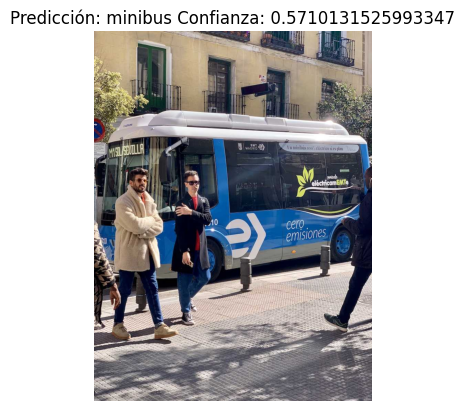

Predicción correcta!


In [15]:
# Implementación de una predicción con YOLO para clasificación
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Cargar el modelo YOLO para clasificación
model = YOLO('../models/yolo/yolo11n-cls.pt')

# Cargar imagen de prueba
image_path = 'https://ultralytics.com/images/bus.jpg'

# Predicción
results = model(image_path)
predicted_class = results[0].names[results[0].probs.top1]
confidence = results[0].probs.top1conf

# Mostrar imagen con resultados
plt.imshow(plt.imread("bus.jpg"))
plt.title(f'Predicción: {predicted_class} Confianza: {confidence}')
plt.axis('off')
plt.show()

# Verificar 
ground_truth = 'minibus'
if predicted_class == ground_truth:
    print('Predicción correcta!')
else:
    print(f'Predicción incorrecta. Se esperaba: {ground_truth}')
